In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import re

In [26]:
with open('slaves/questions.txt') as questions:
    questions_ls = questions.readlines()
    for i in range(19):
        questions_ls[i] = re.sub('\d+\. ','',questions_ls[i])
table_df = pd.DataFrame(questions_ls, columns=['question'])

In [29]:
table_df.to_csv('questions.csv', index=False)

In [30]:
df = pd.read_csv('questions.csv')

<AxesSubplot:>

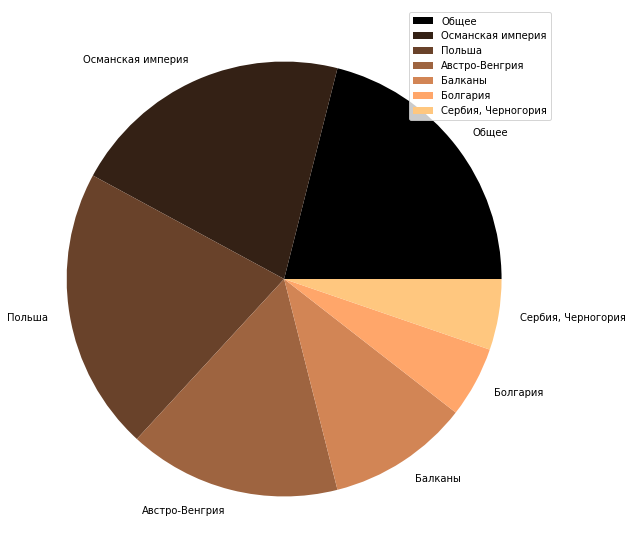

In [193]:
df['region'].value_counts().plot(kind='pie', ylabel='',
                                 figsize=(10, 10), cmap='copper', 
                                 caption='Вопросы по славянам\n относительная раззбивка по регионам')

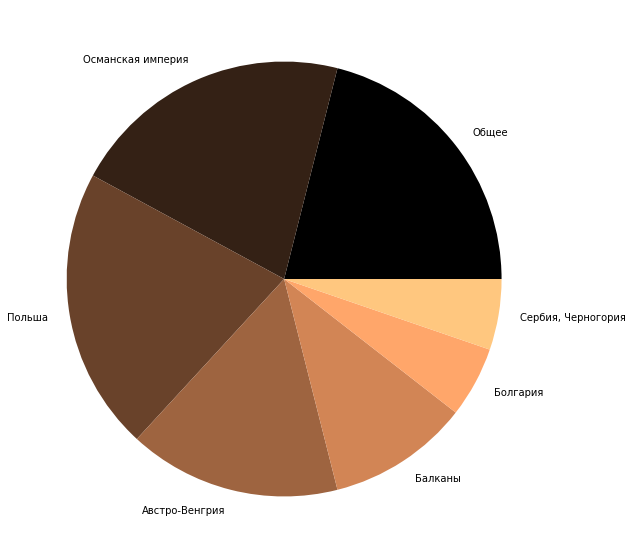

In [191]:
df['region'].value_counts().plot(kind='pie', ylabel='',
                                 figsize=(10, 10), cmap='copper')
plt.savefig('slaves_analysis.jpg')

In [106]:
regs_dict = {
    'Польша' : [0, "Польш", "польск"],
    'Чехия' : [0, "Чех", "чеш", "чех"],
    'Габсбургская монархия' : [0, "Габс", "габс", "Авст", "авст"],
    'Пруссия' : [0, "Прусс", "прусс"],
    'Османская империя' : [0, "Осман", "осман", "Турция", "турец"],
    'Россия' : [0, 'Росс', 'росс'],
    'Сербия' : [0, "Серб", "серб"],
    'Хорватия' : [0, "Хорват", "хорват"],
    'Черногория' : [0, "Черногор", "черногор"],
    'Болгария' : [0, "Болгар", "болгар"],
    'Босния' : [0, "Босн", "босн"]
}


for i in range(19):
    for key in regs_dict:
        for elem in regs_dict[key][1::]:
            if bool(re.search(elem, 
                              questions_ls[i])):
                regs_dict[key][0] +=1


<BarContainer object of 11 artists>

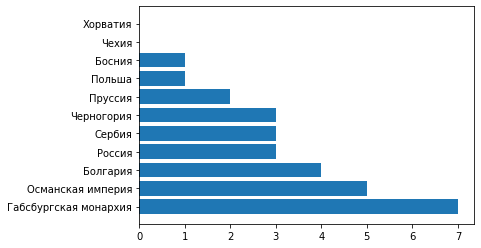

In [128]:
regs_sorted = sorted(regs_dict.items(), key=lambda x: x[1][0], reverse=True)
x = [i[1][0] for i in regs_sorted]
y = [i[0] for i in regs_sorted]

plt.barh(y, x)

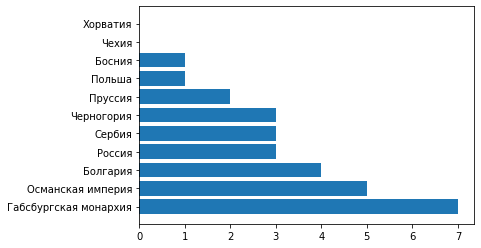

In [192]:
regs_sorted = sorted(regs_dict.items(), key=lambda x: x[1][0], reverse=True)
x = [i[1][0] for i in regs_sorted]
y = [i[0] for i in regs_sorted]

plt.barh(y, x)
plt.savefig('slaves_regex_analysis.jpg')

In [109]:
questions_ls

['Славянские земли под властью Османской империи во второй половине XVII – XVIII в. Славянские народы Османской империи в условиях кризиса военно-ленной системы.\n',
 'Конфессиональная политика османских султанов. Болгарская и сербская церковь как факторы консолидации в процессе складывания народностей. Основы политической самостоятельности Черногории.\n',
 'Славянские земли под властью монархии Габсбургов во второй половине XVII – XVIII в. Обстоятельства инкорпорации, политический и правовой статус. Политика просвещенного абсолютизма Венского императорского двора и славянские народы.\n',
 'Феномен Просвещения в истории и культуре южных и западных славян: образование, литература, наука, общественно-политическая деятельность.\n',
 'Польское государство в конце XVII – первой половине XVIII в. Причины упадка Речи Посполитой.\n',
 'Польский вопрос в политике России, Австрии и Пруссии во второй половине XVIII в. Разделы Речи Посполитой.\n',
 'Государственно-правовое положение южных славян О

In [110]:
with open('Modern_age/novka_questions.txt') as questions:
    questions_ls = questions.readlines()
    for i in range(len(questions_ls)):
        questions_ls[i] = re.sub('\d+\. ','',questions_ls[i])
table_df = pd.DataFrame(questions_ls, columns=['question'])
table_df.to_csv('Modern_age/novka_questions.csv', index=False)

In [2]:
novka_df = pd.read_csv('Modern_age/novka_questions.csv')

<AxesSubplot:>

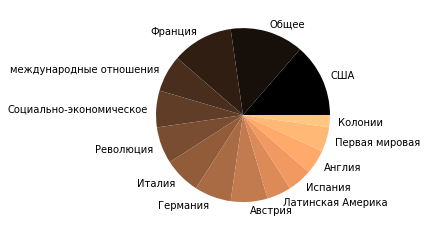

In [125]:
novka_df['region'].value_counts().plot(kind='pie', ylabel='',
                                       cmap='copper')

In [148]:
df.sort_values(by='region')
df['question'] = df['question'].transform(lambda x: x.strip())

In [149]:
!rm slaves/table.html
df.to_html('slaves/table.html')

In [140]:
!mkdir pages

In [141]:
df = df.sort_values(by='region')

In [144]:
!ls

Analysis.ipynb index.html     slaves         table.html
Modern_age     pages          styles.css     tester


In [185]:
print(html_str)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>question</th>
      <th>region</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>Славянские земли под властью монархии Габсбургов во второй половине XVII – XVIII в. Обстоятельства инкорпорации, политический и правовой статус. Политика просвещенного абсолютизма Венского императорского двора и славянские народы.</td>
      <td>Австро-Венгрия</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Политическое положение и социально-экономическое развитие славянских народов в Австро-Венгрии во второй половине XIX в. Проекты федерализации империи.</td>
      <td>Австро-Венгрия</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Славянские народы Австрийской империи и революция 1848–1849 гг. Пражский съезд 1848 г. Австрославизм. Разработка национально-государственных программ.</td>
      <td>Австро-Венгрия</td>
    </tr>
    <tr>
      <th>18</th>
      <td>Балканы в

In [228]:
with open('slaves/books.txt') as books_txt:
    books_ls = books_txt.readlines()
    count = 0
    for book in books_ls:
        link = re.search(r'http?.*\n', book)
        if link != None:
            left_frame = r'<li><a href={} target="_blank">'.format('"' + link.group(0).strip() + '"')
        right_frame = r'</a></li>'
        book_str = re.sub(r'http?.*\n', '', book)
        books_ls[books_ls.index(book)] = left_frame + book_str + right_frame
    print(books_ls)
with open('slaves/books2.html', 'w') as out:
    print(''.join(books_ls), file=out)

['<li><a href="http://www.inslav.ru/images/stories/pdf/2001_Evropejskie_revolucii_1848.pdf" target="_blank">Европейские революции 1848 года. Принцип национальности в политике и идеологии. М.: Индрик, 2001. </a></li>', '<li><a href="http://rutracker.org/forum/viewtopic.php?t=2849966" target="_blank">Западные окраины Российской империи. М., 2006.</a></li>', '<li><a href="https://inslav.ru/publication/zuppan-tysyacha-let-sosedstva-avstriycev-i-chehov-vzglyad-iz-avstrii-m-spb-2021" target="_blank">Зуппан А.\xa0Тысяча лет соседства австрийцев и чехов: взгляд из Австрии / пер. с нем.\xa0А. А. Ждановской; отв. ред. Н. Н. Станков, О. В. Хаванова. — М.: Институт\xa0славяноведения РАН; СПб.: Нестор-История, 2021.\xa0</a></li>', '<li><a href="http://www.inslav.ru/images/stories/pdf/2004_Istorija_Balkan_XVIII.pdf" target="_blank">История Балкан: Век восемнадцатый. М.: Наука, 2004. </a></li>', '<li><a href="https://inslav.ru/sites/default/files/editions/2012_istorija_balkan_vek_xix.pdf" target="_bl

In [229]:
with open('slaves/reference.txt') as books_txt:
    books_ls = books_txt.readlines()
    count = 0
    for book in books_ls:
        link = re.search(r'http?.*\n', book)
        if link != None:
            left_frame = r'<li><a href={} target="_blank">'.format('"' + link.group(0).strip() + '"')
        right_frame = r'</a></li>'
        book_str = re.sub(r'http?.*\n', '', book)
        books_ls[books_ls.index(book)] = left_frame + book_str + right_frame
with open('slaves/reference2.html', 'w') as out:
    print(''.join(books_ls), file=out)

['<li><a href="http://www.inslav.ru/images/stories/pdf/2003_Istorija_Slovakii.pdf" target="_blank">История Словакии. М.: Евролинц, 2003. – 436\xa0с.</a></li>', '<li><a href="http://www.inslav.ru/resursy/elektronnaya-biblioteka/1810-1963-istorija-jugoslavii" target="_blank">История Югославии. Т. 1—2. М., 1963. </a></li>', '<li><a href="https://inslav.ru/publication/kirilina-l-pilko-n-s-churkina-i-v-istoriya-slovenii-spb-2011" target="_blank">Кирилина Л.А., Пилько Н.С., Чуркина И.В. История Словении. М., 2011 </a></li>', '<li><a href="http://www.inslav.ru/resursy/elektronnaya-biblioteka/979--qq-1987" target="_blank">Краткая история Болгарии. С древнейших времен до наших дней. М., 1987. </a></li>', '<li><a href="http://www.inslav.ru/images/stories/pdf/1993_Kratkaja_istorija_Polshi.pdf" target="_blank">Краткая история Польши. С древнейших времен до наших дней. М., 1993. </a></li>', '<li><a href="http://www.inslav.ru/resursy/elektronnaya-biblioteka/981--1988" target="_blank">Краткая история

In [16]:
nums_dict = {}
vals_ls = list(novka_df['region'].value_counts())
lables_ls = list(novka_df['region'].value_counts().index)

for i in range(len(vals_ls)):
    nums_dict[lables_ls[i]] = vals_ls[i]

In [29]:
def label_by_nums_dict(val):
    return nums_dict[str(val)]

novka_df['region_counts'] = novka_df['region'].transform(lambda x: label_by_nums_dict(x))

In [35]:
novka_df.sort_values(by=['region_counts', 'region'], ascending=False)

,question,region,region_counts
7,Социально-экономическое и политическое развити...,США,6
19,Система плантационного рабства в США в первой ...,США,6
20,"Гражданская война в США 1861-65 г.: причины, э...",США,6
21,Реконструкция американского Юга (1865-1877 гг....,США,6
31,Экономическое и политическое развитие США в ко...,США,6
36,Экспансионистская политика США в Западном полу...,США,6
23,Формирование основ индустриального общества в ...,Общее,6
24,Эволюция форм правления в странах Европы и Аме...,Общее,6
25,Эволюция конституционного строя в странах Евро...,Общее,6
26,Эволюция партийно-политических систем в страна...,Общее,6


In [38]:
novka_df[novka_df['region'] == 'Общее']['question'].values

array(['Формирование основ индустриального общества в Европе и Америке в конце XIX – начале XX вв.\n',
       'Эволюция форм правления в странах Европы и Америки в XIX – начале XX вв.\n',
       'Эволюция конституционного строя в странах Европы и Америки в XIX – начале XX вв.\n',
       'Эволюция партийно-политических систем в странах Европы и Америки в XIX – начале XX вв.\n',
       'Эволюция избирательного права в странах Европы и Америки в ХӀХ – начале ХХ вв.\n',
       'Эволюция идейных течений западноевропейской политической мысли в ХӀХ – начале ХХ вв.\n'],
      dtype=object)

In [39]:
novka_df[novka_df['region'] == 'США']['question'].values

array(['Социально-экономическое и политическое развитие США в первой половине ХӀХ в. «Джексоновская демократия».\n',
       'Система плантационного рабства в США в первой половине XIX в. Поиски компромисса между Севером и Югом.\n',
       'Гражданская война в США 1861-65 г.: причины, этапы, итоги. \n',
       'Реконструкция американского Юга (1865-1877 гг.). Компромисс Тилдена–Хейса.\n',
       'Экономическое и политическое развитие США в конце ХӀХ – начале ХХ вв. «Прогрессивная эра».\n',
       'Экспансионистская политика США в Западном полушарии в ХӀХ – начале ХХ вв.\n'],
      dtype=object)